In [25]:
import numpy as np
from scipy import ndimage
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import *
import stpy
#### Import SACLA python library
# os.system("module load python/SACLA_python-3.7")
# os.system("python3")
import dbpy
import stpy

from citius import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from IPython.display import HTML
HTML("""
<script>
window.IPython = {
  notebook: {
    kernel: { execute: function(cmd) { console.log("kernel exec blocked:", cmd); } }
  }
};
</script>
""")

In [57]:
#dbpy.read_runinfo(bl, run)
#output: dictionary of run information
run = 255550
run_info = dbpy.read_runinfo(2, run)

print(run_info)

detectorID_CITIUS = 'CITIUS1'

base_path = "."

darkCITIUS = CITIUSProcessing(base_path, detectorID_CITIUS, bl=2)

{'starttime': 1761476154.845431, 'stoptime': 1761476254.940758, 'total_tagnumber': 6000, 'start_tagnumber': 384559321, 'end_tagnumber': 384565321, 'hightagnumber': 202502, 'comment': 'CITIUS dark', 'fy_id': 'exp2025-2', 'detectors': 'CITIUS1,', 'runtype': '', 'stationnumber': 3, 'runstatus': 0}


In [59]:
darkRun_list = np.arange(255550, 255587)
citiusData = darkCITIUS.load_run_list(darkRun_list)

Loading run 255550
Loading run 255551
Loading run 255552
Loading run 255553
Loading run 255554
Loading run 255555
Loading run 255556
Loading run 255557
Loading run 255558
Loading run 255559
Loading run 255560
Loading run 255561
Loading run 255562
Loading run 255563
Loading run 255564
Loading run 255565
Loading run 255566
Loading run 255567
Loading run 255568
Loading run 255569
Loading run 255570
Loading run 255571
Loading run 255572
Loading run 255573
Loading run 255574
Loading run 255575
Loading run 255576
Loading run 255577
Loading run 255578
Loading run 255579
Loading run 255580
Loading run 255581
Loading run 255582
Loading run 255583
Loading run 255584
Loading run 255585
Loading run 255586


In [185]:
# read in dark runs
array_list = []
for run in darkRun_list:
    filename = f'citiusData/citius_BL3_r{run}.npy'
    #
    df = np.load(filename)
    array_list.append(df)
    
avDark_im = np.sum(array_list,0) / len(array_list)
np.save(f'avDark_im_{darkRun_list[0]}_{darkRun_list[-1]}', avDark_im)

In [186]:
detectorID_CITIUS = 'CITIUS1'

base_path = "citiusData"

CITIUS = CITIUSProcessing(base_path, detectorID_CITIUS, bl=3)

In [187]:
runNo = 1617021
runNumbers = [runNo]
citiusData = CITIUS.load_run_list(runNumbers)

Loading run 1617021


In [188]:
np.shape(citiusData)

(728, 384)

Text(0.5, 1.0, 'ROI')

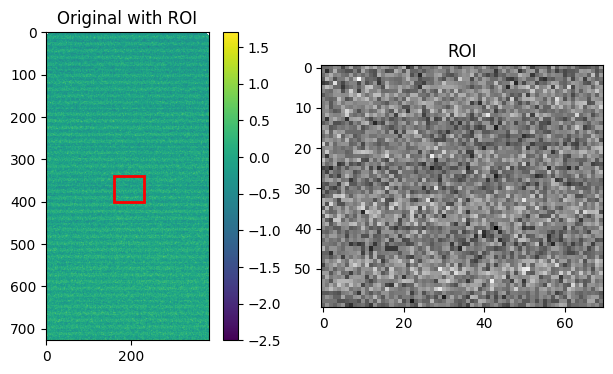

In [189]:
# Select ROI detector
x1, y1, x2, y2 = 160, 340, 230, 400  # ROI coordinates

roi = citiusData[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
im = ax[0].imshow(citiusData)
fig.colorbar(im,ax=ax[0])
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

In [190]:
citiusData_subdark = citiusData - avDark_im

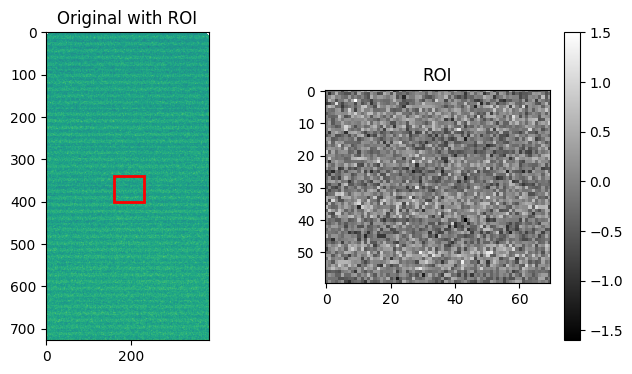

In [191]:
# Select ROI detector
x1, y1, x2, y2 = 160, 340, 230, 400  # ROI coordinates

roi = citiusData_subdark[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(citiusData_subdark)

ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))

ax[0].set_title("Original with ROI")

# ROI itself
im = ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")
fig.colorbar(im)

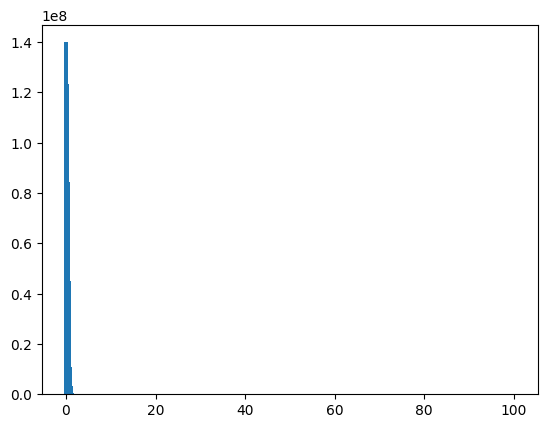

In [194]:
fileName = f"citiusData/citiusHistogram_BL3_r{runNo}.npy"

histogram = np.load(fileName)

bins = []
counts = []
for i in range(np.shape(histogram)[0]):
    bins.append(histogram[i][0])
    counts.append(histogram[i][1])

plt.figure()
plt.bar(bins,counts)
plt.show()

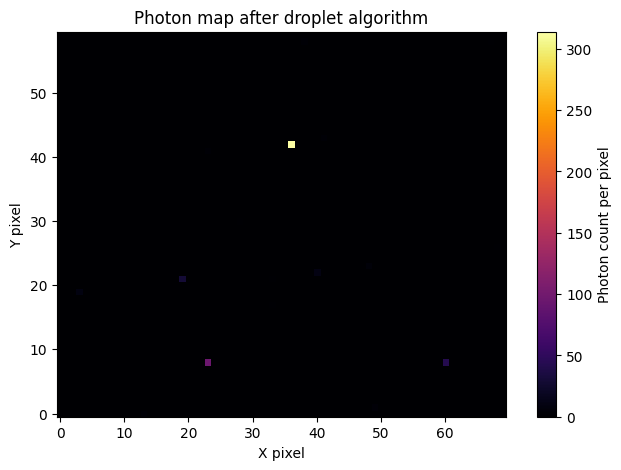

In [195]:
results = CITIUS.apply_droplet_algorithm(roi, runNo, darkIm=None, threshold_adus=0.0, 
                                   save_photon_maps=True, out_dir="photonMaps")

photon_map = results['photon_maps'][runNo]  # example run

plt.figure(figsize=(8,5))
plt.imshow(photon_map, cmap='inferno', origin='lower')
plt.colorbar(label='Photon count per pixel')
plt.title("Photon map after droplet algorithm")
plt.xlabel('X pixel')
plt.ylabel('Y pixel')
plt.show()